In [106]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import cross_val_score
import re
import codecs
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

import torch
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import seaborn as sns
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from wordcloud import WordCloud
from sklearn import svm

from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from itertools import cycle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

###### Food & Beverages	6270 , Oil & Energy	5646,  Apparel & Fashion	4692,  Sports	3050,  Music	2175 

In [112]:
# df = pd.read_csv("../data/6lakh_pipeline_company_companies_data_2021-07-21.csv")
df = pd.read_csv("../data/Eng_split.csv")

df=df[['company_description','company_industry']]
df.head()

,company_description,company_industry
0,ProLeads is The Holy Grail of Account Based Pr...,Information Technology and Services
1,cramway | The collaborative e-learning\n\ncram...,E-Learning
2,Imperix is a Swiss company developing high-end...,Electrical/Electronic Manufacturing
3,Yonhap Infomax is a financial news and data pr...,Information Services
4,Saffron Fix is the ONLY Indian meal-kit delive...,Food & Beverages


In [113]:
print(df.shape)
df1 = df.dropna()
print(df1.shape)

(524853, 2)
(524853, 2)


In [114]:
def get_these_industires(df,indsutries,col_name):
    filtered_data=pd.DataFrame()
    for i in indsutries:
        temp=df.loc[(df[col_name]==i)]
        print(len(temp))
        filtered_data=filtered_data.append(temp)
    filtered_data.reset_index(inplace=True,drop=True)
    return filtered_data

In [115]:
industries=['Food & Beverages','Music',
            'Sports','Oil & Energy',
            'Apparel & Fashion']

In [66]:
df=get_these_industires(df,industries,'company_industry') #before when non eng were there

6270
2175
3050
5646
4692


In [116]:
df=get_these_industires(df,industries,'company_industry')

5487
1950
2721
5301
4160


In [67]:
df['company_industry'].value_counts() #before when non eng were there

Food & Beverages     6270
Oil & Energy         5646
Apparel & Fashion    4692
Sports               3050
Music                2175
Name: company_industry, dtype: int64

In [117]:
df['company_industry'].value_counts()

Food & Beverages     5487
Oil & Energy         5301
Apparel & Fashion    4160
Sports               2721
Music                1950
Name: company_industry, dtype: int64

In [118]:
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(elem)))  
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", str(elem)))
    return df

data_clean = clean_text(df, 'company_description', 'text_clean')
data_clean['company_description'] = data_clean['text_clean']
df = data_clean[['company_description','company_industry']]

In [119]:
df

,company_description,company_industry
0,saffron fix is the only indian mealkit deliver...,Food & Beverages
1,the streats was launched in august of the ide...,Food & Beverages
2,a beer for the gold thirsty us at habesha have...,Food & Beverages
3,driven by our desire to provide the best gourm...,Food & Beverages
4,taylors international services inc is your pre...,Food & Beverages
...,...,...
19614,in mr gert johansson invented the first size ...,Apparel & Fashion
19615,honest engineered outerwearsinaia is engineere...,Apparel & Fashion
19616,slowcolor is an integrated bottom line textile...,Apparel & Fashion
19617,slowear selects the best brands and quality pr...,Apparel & Fashion


In [120]:
def get_word_cloud(df, company_industry_name):

    temp = df.loc[df.company_industry==company_industry_name]
    text2 = " ".join(i for i in temp.company_description)

    # Creating word_cloud with text as argument in .generate() method
    word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)
    word_cloud2.to_file("saved_images/"+company_industry_name+".png")
    plt.figure(figsize=[10,10])
    # Display the generated Word Cloud
    print('***** '+company_industry_name+' *****')
    plt.imshow(word_cloud2, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    return 0

***** Food & Beverages *****


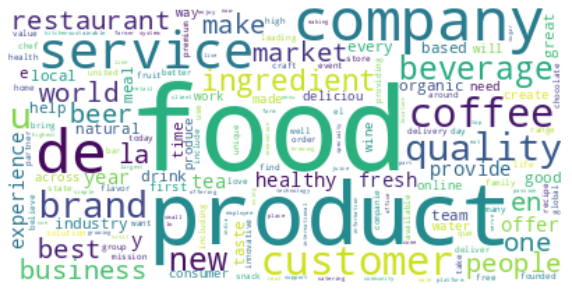

***** Music *****


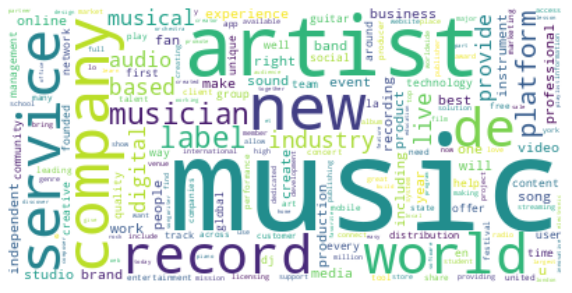

***** Sports *****


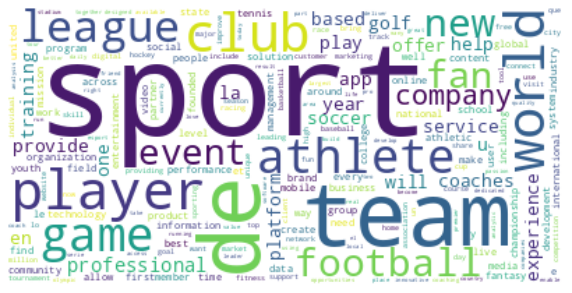

***** Oil & Energy *****


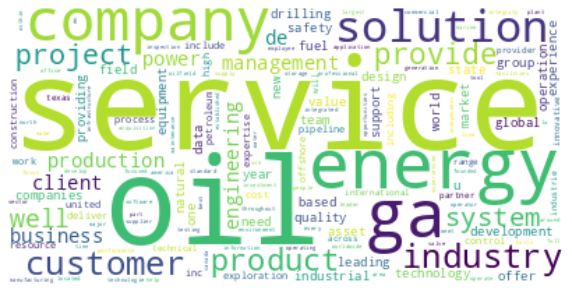

***** Apparel & Fashion *****


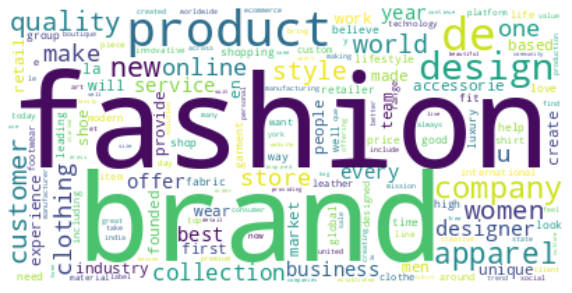

In [37]:
for i in industries:
    get_word_cloud(df,i)

In [121]:
# df['category_id'] = df['company_industry'].factorize()[0]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['company_industry'])
df['category_id']=le.transform(df['company_industry'])
# df['orig']=list(le.inverse_transform(df['Le']))

In [122]:
df

,company_description,company_industry,category_id
0,saffron fix is the only indian mealkit deliver...,Food & Beverages,1
1,the streats was launched in august of the ide...,Food & Beverages,1
2,a beer for the gold thirsty us at habesha have...,Food & Beverages,1
3,driven by our desire to provide the best gourm...,Food & Beverages,1
4,taylors international services inc is your pre...,Food & Beverages,1
...,...,...,...
19614,in mr gert johansson invented the first size ...,Apparel & Fashion,0
19615,honest engineered outerwearsinaia is engineere...,Apparel & Fashion,0
19616,slowcolor is an integrated bottom line textile...,Apparel & Fashion,0
19617,slowear selects the best brands and quality pr...,Apparel & Fashion,0


In [135]:
random_state=42
X_train, X_val, y_train, y_val = train_test_split(df.company_description, 
                                                  df.category_id, 
                                                  test_size=0.15, 
                                                  random_state=random_state, 
                                                  stratify=df.category_id)
y_test=y_val

In [ ]:
'''RUN THIS if new data OR for first time'''

from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('stsb-roberta-large',device='cuda',
                          ) #RoBERTa, an optimized version of BERT by Facebook.


# pool = bert.start_multi_process_pool(normalize_embeddings=True,show_progress_bar=True)
# #Compute the embeddings using the multi-process pool
# emb = bert.encode_multi_process(X_train, pool)
# X_train_vec = pd.DataFrame(np.vstack(emb))

# emb = bert.encode_multi_process(X_test, pool)
# X_test_vec = pd.DataFrame(np.vstack(emb))

# print("Embeddings computed. Shape:", X_train_vec.shape)

# #Optional: Stop the proccesses in the pool
# bert.stop_multi_process_pool(pool)
# # vectorize the data
X_train_vec = pd.DataFrame(np.vstack(X_train.apply(bert.encode)))
X_test_vec = pd.DataFrame(np.vstack(X_val.apply(bert.encode)))

# X_train_vec.to_csv('../data/TEMP_bert_encoded_train_5_Classes.csv',index=False)
# X_test_vec.to_csv('../data/TEMP_bert_encoded_test_5_Classes.csv',index=False)
# y_train.to_csv('../data/TEMP_for_bert_emb_Y_train_5_Classes.csv',index=False)
# y_val.to_csv('../data/TEMP_for_bert_emb_Y_val_5_Classes.csv',index=False)

In [124]:
len(X_train.values)

16676

In [125]:
model = SentenceTransformer('stsb-roberta-large')
embeddings = model.encode(X_train.values,normalize_embeddings=True,show_progress_bar=True)
X_train_vec = pd.DataFrame(np.vstack(embeddings))

In [126]:
embeddings = model.encode(X_val.values,normalize_embeddings=True,show_progress_bar=True)
X_test_vec = pd.DataFrame(np.vstack(embeddings))

In [127]:
X_train_vec.shape , X_test_vec.shape , y_train.shape, y_val.shape

((16676, 1024), (2943, 1024), (16676,), (2943,))

In [13]:
# # '''Run this Cell is Already encoded text is saved'''
# X_train_vec=pd.read_csv('../data/TEMP_bert_encoded_train_5_Classes.csv')
# X_test_vec=pd.read_csv('../data/TEMP_bert_encoded_test_5_Classes.csv')
# y_train=pd.read_csv('../data/TEMP_for_bert_emb_Y_train_5_Classes.csv')
# y_val=pd.read_csv('../data/TEMP_for_bert_emb_Y_val_5_Classes.csv')

# #dropping index column which got added while saving
# X_train_vec=X_train_vec.iloc[:,1:]
# X_test_vec=X_test_vec.iloc[:,1:]
# y_train=y_train.iloc[:,1:]
# y_val=y_val.iloc[:,1:]

# #converting to single dimension
# y_train=y_train.values.ravel()
# y_val=y_val.values.ravel()
# y_test=y_val

In [128]:
# BERT doesn't have feature names, 
#use your classifier

model = RandomForestClassifier(n_estimators=800, n_jobs=-1,verbose=1)
model.fit(X_train_vec, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.3min finished


RandomForestClassifier(n_estimators=800, n_jobs=-1, verbose=1)

In [129]:
model.score(X_test_vec, y_val)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    0.3s finished


0.9446143391097519

In [ ]:
y_pred = model.predict(X_test_vec)
print(metrics.classification_report(y_val, y_pred))

In [ ]:
model = LinearSVC()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

In [ ]:
model.score(X_test_vec, y_val)

In [130]:
LR_model = LogisticRegression(n_jobs=-1,verbose=True)
classifier=LR_model.fit(X_train_vec, y_train)
y_pred = LR_model.predict(X_test_vec)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.5s finished


In [131]:
acc_score = LR_model.score(X_test_vec, y_val)
print(acc_score)

0.9602446483180428


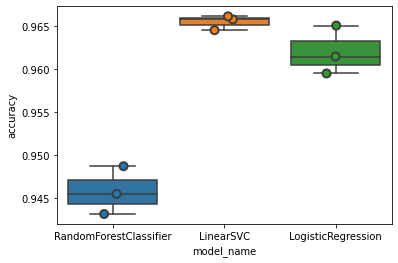

In [132]:
models = [
    RandomForestClassifier(n_estimators=800,random_state=0,n_jobs=-1),
    LinearSVC(),
    LogisticRegression(random_state=0,n_jobs=-1),
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train_vec, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

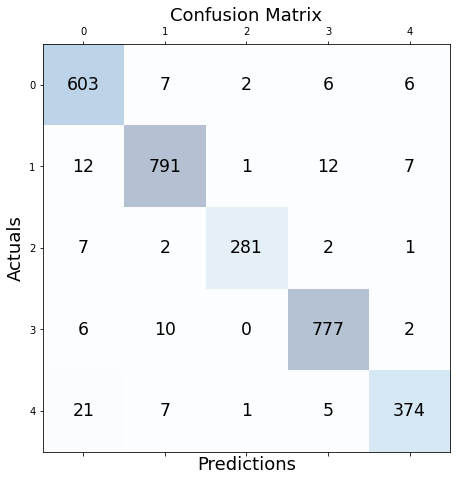

In [133]:
y_test=y_val
'''VERY SLOW'''
# conf_mat = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(conf_mat, annot=True, fmt='d',
#             xticklabels=df.company_industry.values, yticklabels=df.company_industry.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

'''FAST PLOT'''

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [134]:

print(metrics.classification_report(y_test, y_pred, target_names=df['company_industry'].unique()))

                   precision    recall  f1-score   support

 Food & Beverages       0.93      0.97      0.95       624
            Music       0.97      0.96      0.96       823
           Sports       0.99      0.96      0.97       293
     Oil & Energy       0.97      0.98      0.97       795
Apparel & Fashion       0.96      0.92      0.94       408

         accuracy                           0.96      2943
        macro avg       0.96      0.96      0.96      2943
     weighted avg       0.96      0.96      0.96      2943



In [136]:
df['category_id'].value_counts()

1    5487
3    5301
0    4160
4    2721
2    1950
Name: category_id, dtype: int64

In [137]:
X=df['company_description']
y=df['category_id']
     
# Use label_binarize to be multi-label like settings
     
Y = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = Y.shape[1]
    
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.15,
                                                    random_state=42,stratify=df.category_id)
X_train=X_train_vec
X_test=X_test_vec
# We use OneVsRestClassifier for multi-label prediction

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state),n_jobs=-1)
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

In [138]:
classifier.score(X_test, Y_test)

0.945633707101597

In [139]:

n_classes=5

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.99


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.99')

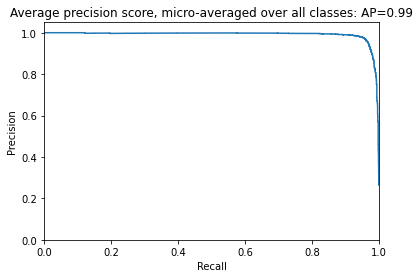

In [140]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

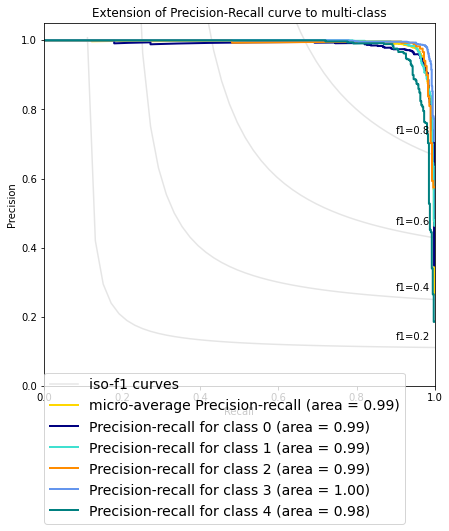

In [141]:

# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))
plt.show()

In [142]:

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


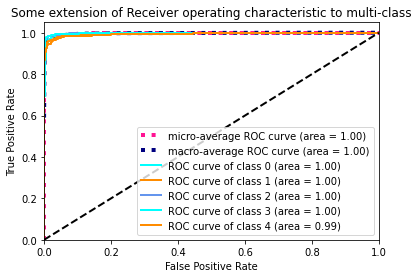

In [143]:
lw=2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [144]:
y_pred = classifier.predict(X_test_vec)

In [145]:
X_val

10201    open since  west penn oil is the countrys lead...
12188    were igs energy  a team of people that believe...
6203     radja sound design agency is an awardwinning e...
15578    woodland is a premium brand of outdoor shoes a...
12182    founded in  we are a world leading independent...
                               ...                        
10677    australian seismic brokers is an oil  energy c...
15494    kooka is an australian owned womens fashion la...
14049    saskarc specializes in structural steel fabric...
8644     cycle masters is a sports company based out of...
17027    otherworld fashion is an alternative online cl...
Name: company_description, Length: 2943, dtype: object

In [146]:
data=pd.DataFrame(X_val)

In [147]:
data["Actual Industry"] = y_val.values.ravel()
data["Predicted Industry"]=np.argmax(y_pred, axis=1)

In [148]:
data

,company_description,Actual Industry,Predicted Industry
10201,open since west penn oil is the countrys lead...,3,3
12188,were igs energy a team of people that believe...,3,3
6203,radja sound design agency is an awardwinning e...,2,2
15578,woodland is a premium brand of outdoor shoes a...,0,0
12182,founded in we are a world leading independent...,3,3
...,...,...,...
10677,australian seismic brokers is an oil energy c...,3,3
15494,kooka is an australian owned womens fashion la...,0,0
14049,saskarc specializes in structural steel fabric...,3,3
8644,cycle masters is a sports company based out of...,4,4


In [149]:
data['Predicted Industry']=list(le.inverse_transform(data['Predicted Industry']))
data['Actual Industry']=list(le.inverse_transform(data['Actual Industry']))

In [150]:
df

,company_description,company_industry,category_id
0,saffron fix is the only indian mealkit deliver...,Food & Beverages,1
1,the streats was launched in august of the ide...,Food & Beverages,1
2,a beer for the gold thirsty us at habesha have...,Food & Beverages,1
3,driven by our desire to provide the best gourm...,Food & Beverages,1
4,taylors international services inc is your pre...,Food & Beverages,1
...,...,...,...
19614,in mr gert johansson invented the first size ...,Apparel & Fashion,0
19615,honest engineered outerwearsinaia is engineere...,Apparel & Fashion,0
19616,slowcolor is an integrated bottom line textile...,Apparel & Fashion,0
19617,slowear selects the best brands and quality pr...,Apparel & Fashion,0


In [151]:
data

,company_description,Actual Industry,Predicted Industry
10201,open since west penn oil is the countrys lead...,Oil & Energy,Oil & Energy
12188,were igs energy a team of people that believe...,Oil & Energy,Oil & Energy
6203,radja sound design agency is an awardwinning e...,Music,Music
15578,woodland is a premium brand of outdoor shoes a...,Apparel & Fashion,Apparel & Fashion
12182,founded in we are a world leading independent...,Oil & Energy,Oil & Energy
...,...,...,...
10677,australian seismic brokers is an oil energy c...,Oil & Energy,Oil & Energy
15494,kooka is an australian owned womens fashion la...,Apparel & Fashion,Apparel & Fashion
14049,saskarc specializes in structural steel fabric...,Oil & Energy,Oil & Energy
8644,cycle masters is a sports company based out of...,Sports,Sports


In [152]:
wrong_preds = data.loc[data['Actual Industry']!=data['Predicted Industry']]
wrong_preds

,company_description,Actual Industry,Predicted Industry
15225,clean fresh water using only renewable power s...,Oil & Energy,Food & Beverages
12300,all igt products are of our own design well pa...,Oil & Energy,Apparel & Fashion
1341,sattviko is indias fastest growing food brand ...,Food & Beverages,Apparel & Fashion
2369,delectatech born from the idea of two senior e...,Food & Beverages,Apparel & Fashion
3571,move systems builds and deploys innovative gre...,Food & Beverages,Apparel & Fashion
...,...,...,...
6813,mike sniper label founderjane abernethy mana...,Music,Apparel & Fashion
15296,full service energy retail agronomy livestock ...,Oil & Energy,Food & Beverages
16510,discover northstar california ski resort,Apparel & Fashion,Sports
18807,the worlds leading motocross consumer lifesty...,Apparel & Fashion,Sports


In [153]:
data.to_csv("5_classes_full_test.csv",index=False)
wrong_preds.to_csv("5_classes_WRONGS_test.csv",index=False)